In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
sensor_file = 'airgradient_data.csv'
airgradient = pd.read_csv(sensor_file)

calibration_file = 'lab_ref_co2_091025_121025.csv'
calibration = pd.read_csv(calibration_file)

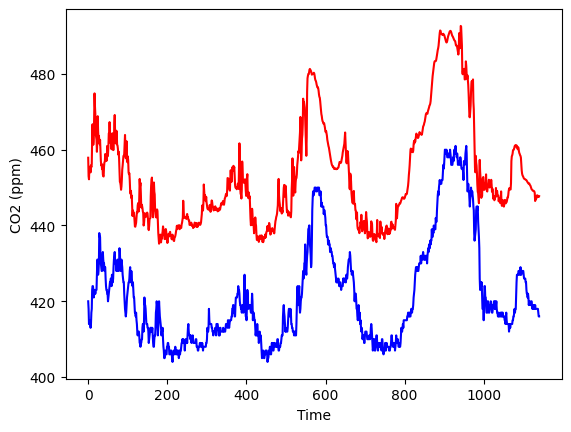

In [ ]:
#AIRGRADIENT TIME FORMAT: 2025-MM-DDTHH:MM:SS.000Z
#CALIBRATION TIME FORMAT: DD/MM/YYYY HH:MM:SS
sensor_start_time = "2025-10-09T00:00:00.000Z"
calibration_start_time = "09/10/2025: 00:00:00"

sensor_co2 = np.flip(airgradient['CO2 (ppm) corrected'])

calibration_co2 = calibration['ref_co2_ppm']

sensor_time = np.linspace(0,len(sensor_co2), len(sensor_co2))
calibration_time = np.linspace(0,len(calibration_co2), len(calibration_co2))


plt.plot(sensor_time, sensor_co2, 'b-')   # blue solid line
plt.plot(calibration_time, calibration_co2, 'r-')   # red solid line
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.show()

[ 0.9363007  58.43880835]


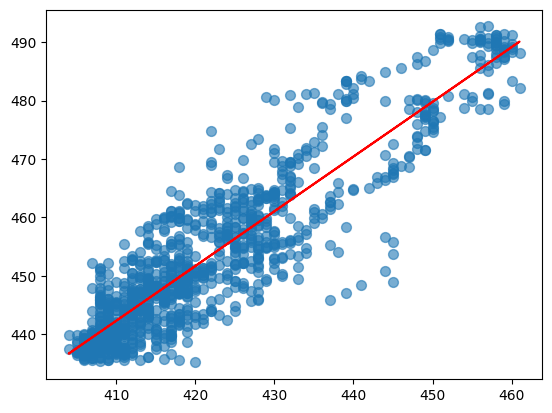

In [ ]:
plt.scatter(sensor_co2,calibration_co2, s=50, alpha=0.6)
line = np.polyfit(sensor_co2, calibration_co2, deg=1)
plt.plot(sensor_co2, np.polyval(line, sensor_co2), 'r-')

gain = line[0]
offset = line[1]

print(line)

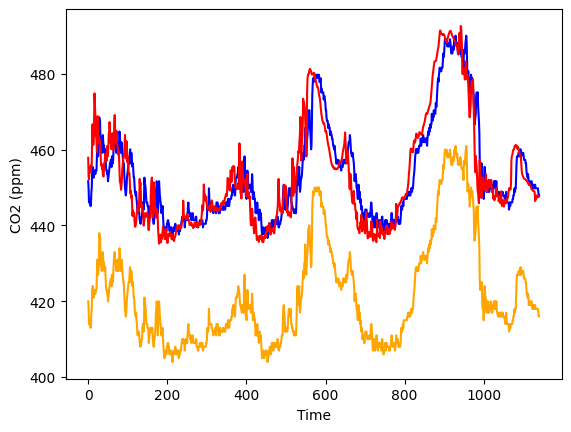

In [ ]:
corrected_co2 = np.polyval(line, sensor_co2) #gain * (sensor_co2 + offset)

plt.plot(sensor_time, sensor_co2, 'orange')   # blue solid line
plt.plot(sensor_time, corrected_co2, 'b-')   # blue solid line
plt.plot(calibration_time, calibration_co2, 'r-')   # red solid line
plt.xlabel('Time')
plt.ylabel('CO2 (ppm)')
plt.show()